<br/>

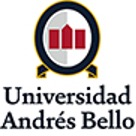

## Tarea 1 - Programación y modelamiento con Python
### Alumno - Sebastián Ituarte
<span style="color:green"><b>Minería de datos empresariales</b></span>

---



In [26]:
# Importamos librerías necesarias para la tarea
from enum import Enum

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

## Actividad 1

In [27]:
# Importamos datos necesarios a DataFrame
df = pd.read_csv("hotel_bookings.csv")

In [28]:
# Imprimimos características
print("Características del Dataframe")
num_filas, num_columnas = df.shape
print(df.shape)

# Cantidad de registros filas
print("Cantidad de filas")
print(num_filas)

# Cantidad de características columnas
print("Cantidad de columnas")
print(num_columnas)

# Imprimimos los nombres de las columnas
print("\n")
print("Nombre de sus columnas")
print(df.columns)

Características del Dataframe
(119390, 32)
Cantidad de filas
119390
Cantidad de columnas
32


Nombre de sus columnas
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [29]:
# Imprimimos una muestra de los datos
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
67980,City Hotel,1,329,2017,May,19,10,0,4,1,...,No Deposit,9.0,NaN,0,Transient,109.80,0,2,Canceled,2017-04-20
98389,City Hotel,0,95,2016,September,40,26,1,2,2,...,No Deposit,7.0,NaN,0,Transient,111.31,0,2,Check-Out,2016-09-29
34732,Resort Hotel,0,61,2017,April,13,1,1,1,2,...,No Deposit,240.0,NaN,0,Transient,67.00,1,2,Check-Out,2017-04-03
59771,City Hotel,1,166,2016,November,45,1,0,3,1,...,Non Refund,236.0,NaN,0,Transient,110.00,0,0,Canceled,2016-07-13
17094,Resort Hotel,0,262,2015,September,39,21,1,3,1,...,No Deposit,183.0,NaN,0,Transient-Party,65.50,0,0,Check-Out,2015-09-25


### Clasificación de variables

In [30]:
# Creamos el tipo de datos para los tipos de variables
class TipoVariable(Enum):
    NOMINAL = "Nominal"
    ORDINAL = "Ordinal"
    INTERVALO = "Intervalo"
    RAZON = "Razón"


# Creamos diccionario con clasificación de variables
clasificacion = {
    "hotel": TipoVariable.NOMINAL,  # H1 = Resort Hotel o H2 = City Hotel
    "is_canceled": TipoVariable.NOMINAL,  # Valor que indica si la reserva se ha cancelado (1) o no (0)
    "lead_time": TipoVariable.RAZON,  # Número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada
    "arrival_date_year": TipoVariable.INTERVALO,  # Año de la fecha de llegada
    "arrival_date_month": TipoVariable.ORDINAL,  # Mes de la fecha de llegada (1 a 12)
    "arrival_date_week_number": TipoVariable.ORDINAL,  # Número de semana del año para la fecha de llegada
    "arrival_date_day_of_month": TipoVariable.ORDINAL,  # Día de llegada (1 a 31)
    "stays_in_weekend_nights": TipoVariable.RAZON,  # Número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para alojarse en el hotel
    "stays_in_week_nights": TipoVariable.RAZON,  # Número de noches de la semana (de lunes a viernes) que el huésped se alojó o reservó para alojarse en el hotel
    "adults": TipoVariable.RAZON,  # Número de adultos
    "children": TipoVariable.RAZON,  # Número de niños
    "babies": TipoVariable.RAZON,  # Número de bebés
    "meal": TipoVariable.NOMINAL,  # Tipo de comida reservada
    "country": TipoVariable.NOMINAL,  # País de origen
    "market_segment": TipoVariable.NOMINAL,  # Designación del segmento de mercado
    "distribution_channel": TipoVariable.NOMINAL,  # Canal de distribución de reservas
    "is_repeated_guest": TipoVariable.NOMINAL,  # Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0)
    "previous_cancellations": TipoVariable.RAZON,  # Número de reservas anteriores canceladas por el cliente antes de la reserva actual
    "previous_bookings_not_canceled": TipoVariable.RAZON,  # Número de reservas anteriores no canceladas por el cliente antes de la reserva actual
    "reserved_room_type": TipoVariable.NOMINAL,  # Código del tipo de habitación reservada
    "assigned_room_type": TipoVariable.NOMINAL,  # Código del tipo de habitación asignado a la reserva
    "booking_changes": TipoVariable.RAZON,  # Número de cambios realizadas en la reserva desde el momento en que se introdujo en el PMS
    "deposit_type": TipoVariable.NOMINAL,  # Indicación de si el cliente hizo un depósito para garantizar la reserva
    "agent": TipoVariable.NOMINAL,  # ID de la agencia de viajes que realizó la reserva
    "company": TipoVariable.NOMINAL,  # ID de la empresa/entidad que realizó la reserva o responsable del pago de la reserva
    "days_in_waiting_list": TipoVariable.RAZON,  # Número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente
    "customer_type": TipoVariable.NOMINAL,  # Tipo de reserva
    "adr": TipoVariable.RAZON,  # Tarifa media diaria
    "required_car_parking_spaces": TipoVariable.RAZON,  # Número de plazas de aparcamiento que necesita el cliente
    "total_of_special_requests": TipoVariable.RAZON,  # Número de peticiones especiales realizadas por el cliente
    "reservation_status": TipoVariable.NOMINAL,  # Último estado de la reserva
    "reservation_status_date": TipoVariable.INTERVALO,  # Fecha en la que se estableció el último estado
}

print("##########################")
print("Clasificación de variables")
print("##########################\n")

for key, value in clasificacion.items():
    print(f"{key}: {value.value}")

##########################
Clasificación de variables
##########################

hotel: Nominal
is_canceled: Nominal
lead_time: Razón
arrival_date_year: Intervalo
arrival_date_month: Ordinal
arrival_date_week_number: Ordinal
arrival_date_day_of_month: Ordinal
stays_in_weekend_nights: Razón
stays_in_week_nights: Razón
adults: Razón
children: Razón
babies: Razón
meal: Nominal
country: Nominal
market_segment: Nominal
distribution_channel: Nominal
is_repeated_guest: Nominal
previous_cancellations: Razón
previous_bookings_not_canceled: Razón
reserved_room_type: Nominal
assigned_room_type: Nominal
booking_changes: Razón
deposit_type: Nominal
agent: Nominal
company: Nominal
days_in_waiting_list: Razón
customer_type: Nominal
adr: Razón
required_car_parking_spaces: Razón
total_of_special_requests: Razón
reservation_status: Nominal
reservation_status_date: Intervalo


### Analizamos el Dataframe antes de realizar la limpieza de datos

In [31]:
# Estudiamos el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [32]:
# Revisamos los valores nulos
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Realizamos la limpieza de datos en filas

In [33]:
# Calcular el número total de entradas en el DataFrame
total_entradas = len(df)

# Calcular el 30% del total de entradas
umbral_valores_ausentes = total_entradas * 0.3

# Calcular el 50% del umbral para cantidad de categorías
umbral_cantidad_categorias = total_entradas * 0.5

# Almaceno las columnas a eliminar para la limpieza del DataFrame
columnas_para_eliminar = []

# Iterar sobre cada columna para contar valores únicos y ausentes
for columna in df.columns:
    valores_unicos = df[columna].nunique()
    valores_ausentes = df[columna].isnull().sum()

    # Verificar si la columna debe ser eliminada por valores ausentes
    if valores_ausentes >= umbral_valores_ausentes:
        columnas_para_eliminar.append(columna)

    # Verificar si la columna debe ser eliminada por tener demasiadas categorías
    elif valores_unicos > umbral_cantidad_categorias:
        columnas_para_eliminar.append(columna)

# Imprimir las columnas eliminadas para referencia
print("Columnas eliminadas:", columnas_para_eliminar)

# Eliminar las columnas marcadas
df = df.drop(columns=columnas_para_eliminar)

Columnas eliminadas: ['company']


### Realizamos la limpieza de datos en columnas

In [34]:
# Eliminar filas con dos o más atributos sin valor
df = df[df.isnull().sum(axis=1) < 2]

# Imprimimos el nuevo tamaño del DataFrame para referencia
print("Nuevo tamaño del DataFrame después de eliminar filas:", df.shape)

Nuevo tamaño del DataFrame después de eliminar filas: (119054, 31)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119054 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119054 non-null  object 
 1   is_canceled                     119054 non-null  int64  
 2   lead_time                       119054 non-null  int64  
 3   arrival_date_year               119054 non-null  int64  
 4   arrival_date_month              119054 non-null  object 
 5   arrival_date_week_number        119054 non-null  int64  
 6   arrival_date_day_of_month       119054 non-null  int64  
 7   stays_in_weekend_nights         119054 non-null  int64  
 8   stays_in_week_nights            119054 non-null  int64  
 9   adults                          119054 non-null  int64  
 10  children                        119052 non-null  float64
 11  babies                          119054 non-null  int64  
 12  meal                 

### Escoja tres variables de tipo Razón continuas y tres Nominales que considere importantes para explicar si se cancela o no una reserva, debe explicar esto.

#### Variables de tipo Razón (continuas):

- **Lead Time (lead_time):**

El tiempo de anticipación entre la reserva y la fecha de llegada puede influir significativamente en la probabilidad de cancelación. Un lead time más largo podría indicar una mayor incertidumbre o cambios en los planes del huésped.

- **Average Daily Rate (adr):**

Podría influir en la decisión de cancelación, ya que tarifas más altas pueden llevar a los clientes a reconsiderar el valor de la reserva o buscar alternativas más económicas.

- **Number of Previous Cancellations (previous_cancellations):**

Este es el número de reservas anteriores canceladas por el cliente antes de la reserva actual. Un historial de cancelaciones pasadas podría indicar una mayor probabilidad de cancelación futura.

#### Variables Nominales:

- **Deposit Type (deposit_type):**

Esta variable puede influir significativamente en la decisión de cancelar. Las reservas con depósitos no reembolsables tienen menos probabilidades de ser canceladas en comparación con las que permiten cancelaciones gratuitas.

- **Customer Type (customer_type):**

El tipo de cliente puede dar indicios sobre la probabilidad de cancelación. Los clientes transitorios, por ejemplo, podrían tener una mayor tasa de cancelación en comparación con los clientes contractuales que tienen acuerdos a largo plazo.

- **Hotel Type (hotel):**

El tipo de hotel (Resort Hotel o City Hotel) podría influir en la política de cancelación y las expectativas de los huéspedes. Por ejemplo, los resorts podrían tener políticas de cancelación más estrictas debido a la planificación anticipada requerida.

#### Conclusión de selección:

Estas variables, combinadas con técnicas de análisis y modelado estadístico, pueden ayudar a predecir la probabilidad de cancelación de una reserva, permitiendo a los hoteles gestionar mejor sus inventarios y estrategias de precios.

### Gráfico de caja y bigotes

In [36]:
# Variables de tipo Razón
razon_variables = ["lead_time", "adr", "previous_cancellations"]

# Analizamos los datos previo a realizar el grafico
df[razon_variables].describe()

,lead_time,adr,previous_cancellations
count,119054.000000,119054.000000,119054.000000
mean,104.262452,101.953861,0.087129
std,106.892301,50.493503,0.845370
min,0.000000,-6.380000,0.000000
25%,18.000000,69.700000,0.000000
50%,69.000000,95.000000,0.000000
75%,161.000000,126.000000,0.000000
max,737.000000,5400.000000,26.000000


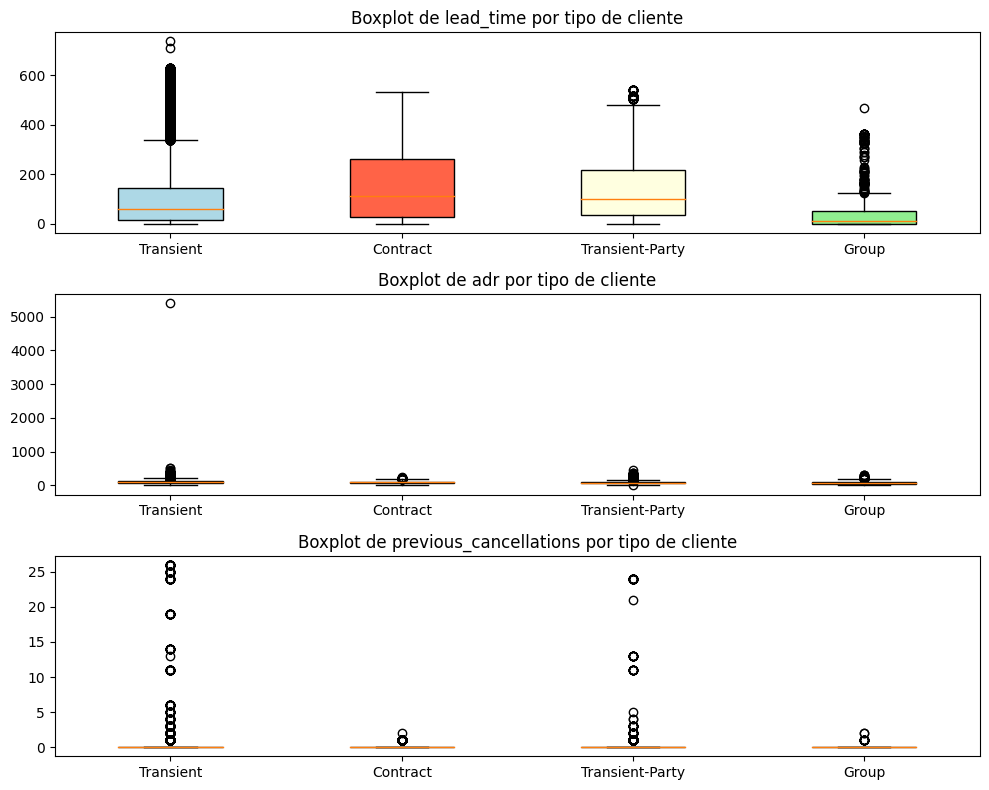

In [37]:
# Obtener los tipos únicos de clientes
customer_types = df["customer_type"].unique()

# Resultado: ['Transient' 'Contract' 'Transient-Party' 'Group']

# Colores para los gráficos de caja
box_colors = ["lightblue", "tomato", "lightyellow", "lightgreen"]

# Crear gráficos de caja y bigotes para cada variable, separados por tipo de cliente
fig, axs = plt.subplots(nrows=len(razon_variables), ncols=1, figsize=(10, 8))

for i, var in enumerate(razon_variables):
    data_to_plot = [
        df[df["customer_type"] == customer_type][var]
        for customer_type in customer_types
    ]
    bplot = axs[i].boxplot(data_to_plot, patch_artist=True)
    axs[i].set_title(f"Boxplot de {var} por tipo de cliente")
    axs[i].set_xticklabels(customer_types)

    # Colorear cada caja
    for patch, color in zip(bplot["boxes"], box_colors):
        patch.set_facecolor(color)

plt.tight_layout()
plt.show()

In [38]:
# Calcular y contar outliers
for var in razon_variables:
    Q1 = np.quantile(df[var], 0.25)
    Q3 = np.quantile(df[var], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    print(f"{var} tiene {len(outliers)} outliers.")

lead_time tiene 2982 outliers.
adr tiene 3876 outliers.
previous_cancellations tiene 6459 outliers.


## Actividad 2

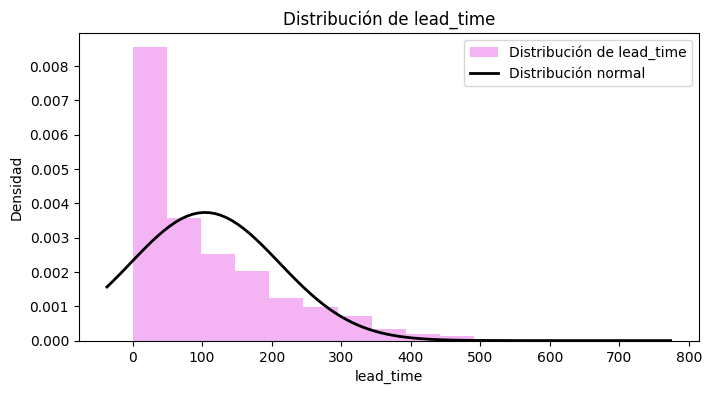

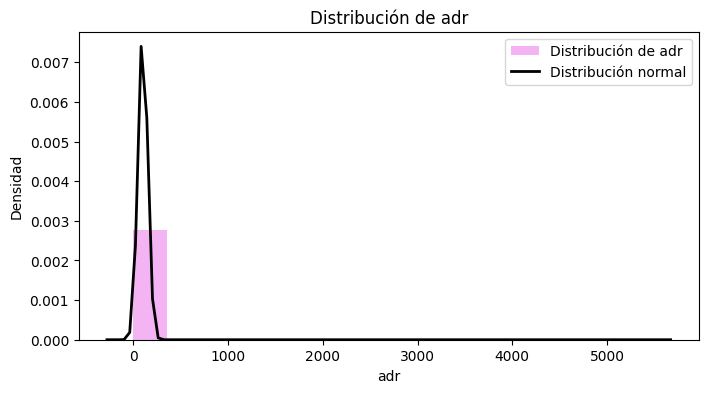

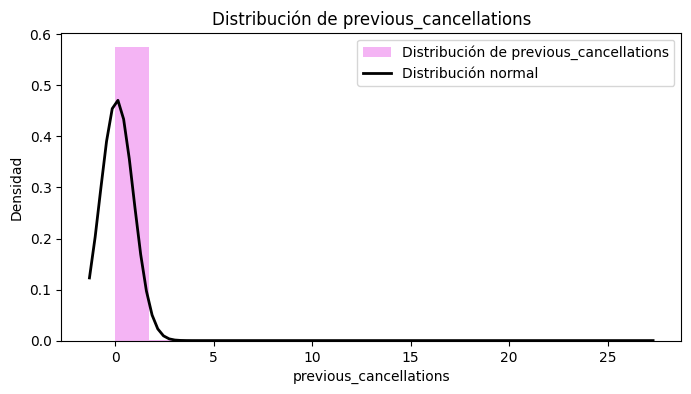

In [39]:
def estadistica(data, var):
    q1 = np.percentile(data[var], 25)
    q3 = np.percentile(data[var], 75)
    iqr = q3 - q1

    data_estadistica = {
        "media": np.mean(data[var]),
        "desviacion_std": np.std(data[var], ddof=1),
        "mediana": np.median(data[var]),
        "varianza": np.var(data[var], ddof=1),
        "q1": q1,
        "q3": q3,
        "iqr": iqr,
    }

    print(f"Datos estadisticos para variable - {var}")
    print(data_estadistica)


def plot_distribucion(data, var):
    # Crear el histograma
    plt.figure(figsize=(8, 4))
    n, bins, patches = plt.hist(
        data[var],
        bins=15,
        density=True,
        alpha=0.6,
        color="violet",
        label=f"Distribución de {variable}",
    )

    # Añadir curva normal
    media = np.mean(data[var])
    desviacion_std = np.std(data[var], ddof=1)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = sc.stats.norm.pdf(x, media, desviacion_std)
    plt.plot(x, p, "k", linewidth=2, label="Distribución normal")

    # Generar grafico
    plt.title(f"Distribución de {variable}")
    plt.xlabel(variable)
    plt.ylabel("Densidad")
    plt.legend()
    plt.show()


# Crear visualizaciones para cada variable
for variable in razon_variables:
    plot_distribucion(df, variable)

In [40]:
# Calcular datos estadísticos de tendencia central y dispersión
for variable in razon_variables:
    estadistica(df, variable)

Datos estadisticos para variable - lead_time
{'media': 104.26245233255497, 'desviacion_std': 106.89230059789901, 'mediana': 69.0, 'varianza': 11425.9639271116, 'q1': 18.0, 'q3': 161.0, 'iqr': 143.0}
Datos estadisticos para variable - adr
{'media': 101.95386093705378, 'desviacion_std': 50.49350343104541, 'mediana': 95.0, 'varianza': 2549.5938887409948, 'q1': 69.7, 'q3': 126.0, 'iqr': 56.3}
Datos estadisticos para variable - previous_cancellations
{'media': 0.08712852991079678, 'desviacion_std': 0.8453696884805108, 'mediana': 0.0, 'varianza': 0.7146499102016357, 'q1': 0.0, 'q3': 0.0, 'iqr': 0.0}


#### lead_time
- **Outliers:** 2,982

Estos datos muestran que hay una considerable variabilidad en los tiempos de anticipación de las reservas en este dataset, con una cantidad significativa de outliers que podrían influir en los análisis y las decisiones basadas en estos datos.

#### adr
- **Outliers:** 3,876 (aproximadamente 3.25% del total de entradas)

Estos datos muestran que las tarifas diarias tienen una variabilidad considerable, con un rango amplio de valores. Aunque aproximadamente el 3.25% de los registros se consideran outliers, esto sugiere que estos valores extremos pueden influir en los análisis, pero no dominan la distribución general de los datos.

#### previous_cancellations
- **Outliers:** 6,459 (aproximadamente 5.42% del total de entradas)

Estos datos muestran que una proporción significativa de las reservas tiene cancelaciones previas. Con aproximadamente el 5.42% de los registros como outliers, estos valores extremos indican una variabilidad considerable en las cancelaciones previas, lo cual es importante considerar al analizar la gestión de reservas y las políticas de cancelación.
elación.
atos.


## Actividad 3

In [41]:
# Escalamiento
df_scaled = pd.DataFrame(
    MinMaxScaler().fit_transform(df[razon_variables]), columns=razon_variables
)

df_scaled

,lead_time,adr,previous_cancellations
0,0.464043,0.001180,0.0
1,1.000000,0.001180,0.0
2,0.009498,0.015053,0.0
3,0.017639,0.015053,0.0
4,0.018996,0.019307,0.0
...,...,...,...
119049,0.031208,0.018963,0.0
119050,0.138399,0.042877,0.0
119051,0.046133,0.030351,0.0
119052,0.147897,0.020491,0.0


In [42]:
# Estandarización
df_standardized = pd.DataFrame(
    StandardScaler().fit_transform(df[razon_variables]), columns=razon_variables
)

df_standardized

,lead_time,adr,previous_cancellations
0,2.224094,-2.019157,-0.103066
1,5.919418,-2.019157,-0.103066
2,-0.909915,-0.533811,-0.103066
3,-0.853783,-0.533811,-0.103066
4,-0.844428,-0.078305,-0.103066
...,...,...,...
119049,-0.760231,-0.115141,-0.103066
119050,-0.021166,2.445397,-0.103066
119051,-0.657323,1.104229,-0.103066
119052,0.044321,0.048445,-0.103066


In [43]:
# Normalización
df_normalized = pd.DataFrame(
    Normalizer().fit_transform(df[razon_variables]), columns=razon_variables
)

df_normalized

,lead_time,adr,previous_cancellations
0,1.000000,0.000000,0.0
1,1.000000,0.000000,0.0
2,0.092929,0.995673,0.0
3,0.170787,0.985308,0.0
4,0.141421,0.989949,0.0
...,...,...,...
119049,0.232669,0.972556,0.0
119050,0.412234,0.911078,0.0
119051,0.210744,0.977541,0.0
119052,0.722181,0.691704,0.0


## Actividad 4

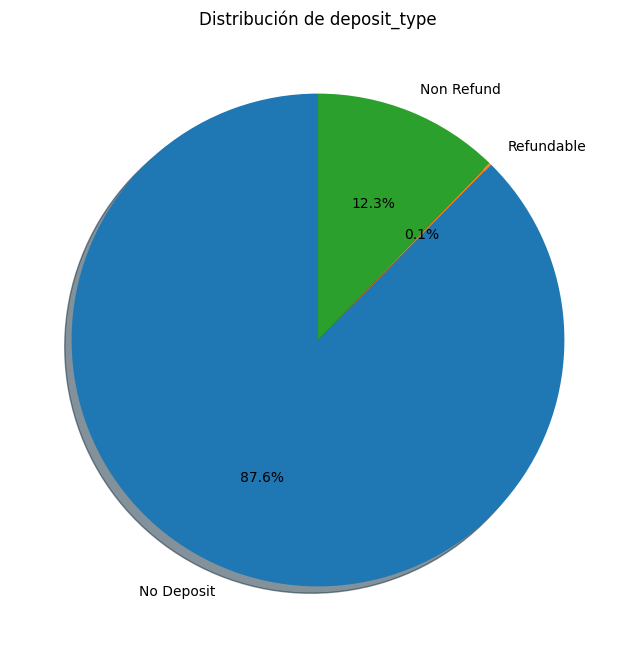

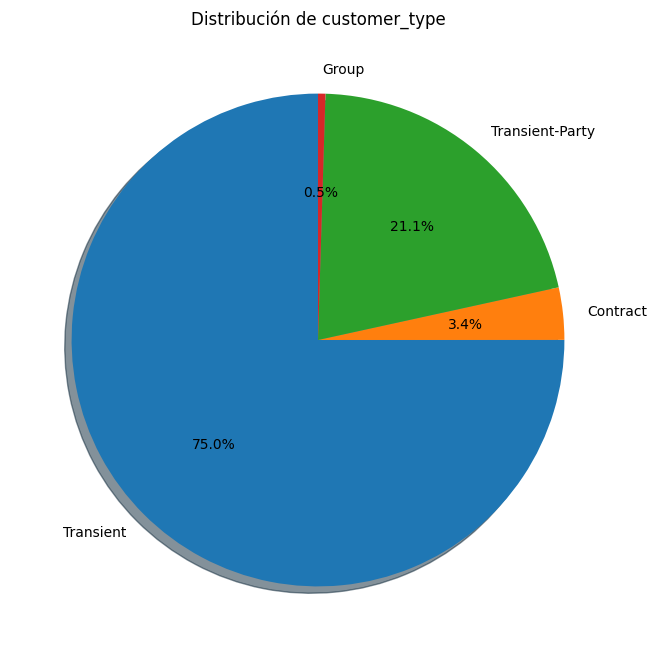

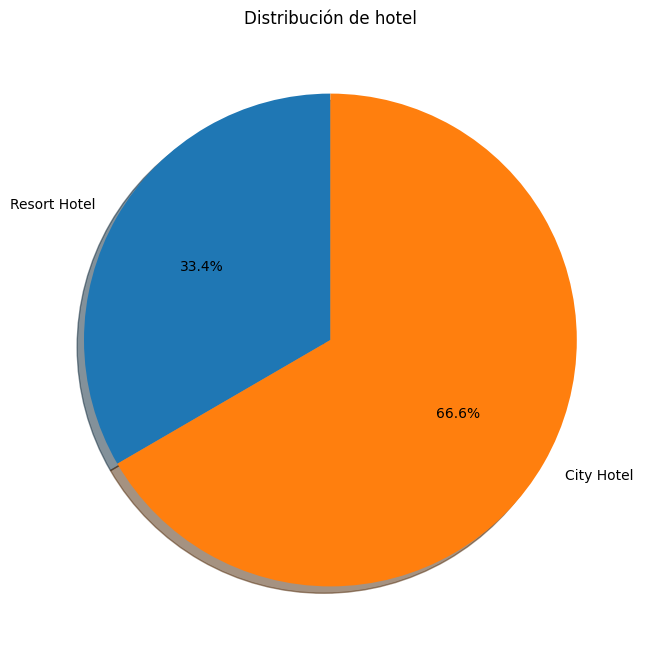



Hallazgos para deposit_type:
La categoría más común en deposit_type es No Deposit con una frecuencia de 104305.

Hallazgos para customer_type:
La categoría más común en customer_type es Transient con una frecuencia de 89302.

Hallazgos para hotel:
La categoría más común en hotel es City Hotel con una frecuencia de 79320.



In [44]:
# Variables nominales
nominales_variables = ["deposit_type", "customer_type", "hotel"]


def generar_grafico(data, var):
    # Contar la frecuencia de cada categoría
    frecuencias = data[var].value_counts(sort=False)

    # Generar gráfico de torta
    plt.figure(figsize=(8, 8))
    plt.pie(
        frecuencias,
        labels=frecuencias.index,
        autopct="%1.1f%%",
        startangle=90,
        shadow=True,
    )
    plt.title(f"Distribución de {var}")
    plt.show()


def hallazgos(data, var):
    # Contar la frecuencia de cada categoría
    frecuencias = data[var].value_counts(sort=False)

    print(f"Hallazgos para {var}:")
    # Aquí se imprimen las observaciones específicas sobre la distribución de cada variable
    print(
        f"La categoría más común en {var} es {frecuencias.idxmax()} con una frecuencia de {frecuencias.max()}.\n"
    )


for var in nominales_variables:
    # Generar gráfico de torta
    generar_grafico(df, var)

print("\n")

for var in nominales_variables:
    # Comentamos los hallazgos
    hallazgos(df, var)

## Actividad 5

Para predecir si una reserva se va a cancelar o no, se está abordando un problema de clasificación binaria, ya que el resultado que se busca predecir es de naturaleza binaria: la reserva se cancela (1) o no se cancela (0). En este contexto, se pueden aplicar varios algoritmos de aprendizaje automático (Machine Learning) diseñados para clasificación binaria, incluyendo:

**Regresión Logística:** A pesar de su nombre, es un modelo lineal para clasificación binaria que estima probabilidades y clasifica los casos en función de una umbral.

**Árboles de Decisión:** Modelo que utiliza una estructura de árbol para tomar decisiones, fácil de interpretar y útil para entender las variables más importantes.

**Random Forest:** Un ensamble de árboles de decisión que mejora la robustez y precisión del modelo mediante el promedio de múltiples árboles.

**Máquinas de Soporte Vectorial (SVM):** Busca el hiperplano que mejor separa las clases en el espacio de características.

**Redes Neuronales Artificiales:** Modelos flexibles y potentes que pueden capturar relaciones complejas entre las características.

**Gradient Boosting:** Un método de ensamble que construye secuencialmente árboles de decisión, cada uno tratando de corregir los errores del anterior.
ma específico.

## Actividad 6

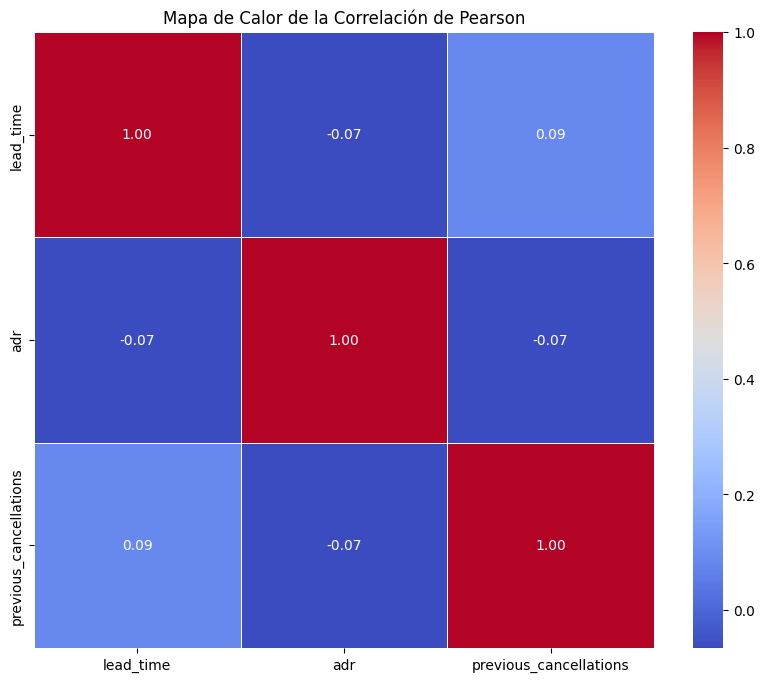

In [45]:
import seaborn as sns

# Calculando la matriz de correlación de Pearson
matriz_correlacion = df[razon_variables].corr()

# Creando el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()